# Redes Neurais Recorrentes LSTM - Long Short-Term Memory


# Prevendo Séries Temporais com LSTMs

A previsão de séries temporais é um problema difícil para o aprendizado da máquina.

O problema que vamos analisar é a previsão dos passageiros das companhias aéreas internacionais. Este é um problema em que, dado um ano e um mês, a tarefa é prever o número de passageiros das linhas aéreas internacionais em unidades de 1.000. Os dados variam de janeiro de 1949 a dezembro 1960 ou 12 anos, com 144 observações. O conjunto de dados está disponível gratuitamente no DataMarket, aqui:https://www.kaggle.com/andreazzini/international-airline-passengers, com o nome internacional-companhia aérea-passageiros.csv (você encontra o arquivo em anexo com o nome passageiros.csv).


# Etapa 1: Importação das bibliotecas


In [13]:
!pip install keras --upgrade
!pip install matplotlib --upgrade
!pip install numpy --upgrade
!pip install pandas --upgrade
!pip install sklearn --upgrade
!pip install tensorflow --upgrade


In [14]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [15]:
import tensorflow as tf
tf.__version__


'2.7.0'

In [16]:
import keras as k
k.__version__


'2.7.0'

In [17]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


In [18]:
np.random.seed(7)


# Etapa 2: Carregamento e exploração da base de dados


Podemos carregar este conjunto de dados facilmente usando a biblioteca Pandas. Não estamos interessados na data,
pois que cada observação é separada pelo mesmo intervalo de um mês. Portanto, quando
carregamos o conjunto de dados, podemos excluir a primeira coluna. O conjunto de dados baixado também tem rodapé
com informações que podemos excluir com o argumento skipfooter para `pd.read_csv()` (Pandas)
Uma vez carregado, podemos plotar facilmente todo o conjunto de dados.


In [19]:
# from google.colab import drive
# drive.mount('/content/drive')


In [20]:
dataframe = pd.read_csv('data/passageiros.csv')


In [12]:
dataframe


,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0
...,...,...
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0


In [22]:
dataframe = pd.read_csv('data/passageiros.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')


# Etapa 3: Visualização dos dados


In [23]:
dataset


array([[112.],
       [118.],
       [132.],
       [129.],
       [121.],
       [135.],
       [148.],
       [148.],
       [136.],
       [119.],
       [104.],
       [118.],
       [115.],
       [126.],
       [141.],
       [135.],
       [125.],
       [149.],
       [170.],
       [170.],
       [158.],
       [133.],
       [114.],
       [140.],
       [145.],
       [150.],
       [178.],
       [163.],
       [172.],
       [178.],
       [199.],
       [199.],
       [184.],
       [162.],
       [146.],
       [166.],
       [171.],
       [180.],
       [193.],
       [181.],
       [183.],
       [218.],
       [230.],
       [242.],
       [209.],
       [191.],
       [172.],
       [194.],
       [196.],
       [196.],
       [236.],
       [235.],
       [229.],
       [243.],
       [264.],
       [272.],
       [237.],
       [211.],
       [180.],
       [201.],
       [204.],
       [188.],
       [235.],
       [227.],
       [234.],
       [264.],
       [30

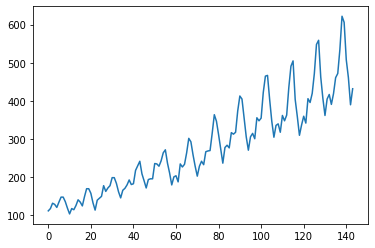

In [24]:
plt.plot(dataset)
plt.show()


# Etapa 4: Tratamento da base de dados


Agora podemos definir uma função para criar um novo conjunto de dados como descrito acima. A função
recebe 2 argumentos: o conjunto de dados, que é um array NumPy que queremos converter em um dataset e
look back que é o número de etapas de tempo anteriores para usar como variáveis de entrada para prever
O próximo período de tempo, neste caso, definido como 1. Esse padrão criará um conjunto de dados onde X é
o número de passageiros em um determinado momento (t) e Y é o número de passageiros no próximo
momento (t + 1).


**negrito**##Normaliza os dados
As LSTMs são sensíveis à escala dos dados de entrada, especificamente quando funções de ativação sigmoide (padrão)
ou tanh são usadas. Pode ser uma boa prática redimensionar os dados para o range de 0 a 1,
também chamado de normalização. Podemos normalizar facilmente o conjunto de dados usando a classe MinMaxScaler do scikit-learn


In [25]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)


In [26]:
dataset


array([[0.01544401],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984557],
       [0.08494207],
       [0.08494207],
       [0.06177607],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123553],
       [0.04247104],
       [0.07142857],
       [0.05984557],
       [0.04054055],
       [0.08687258],
       [0.12741312],
       [0.12741312],
       [0.10424709],
       [0.05598456],
       [0.01930502],
       [0.06949806],
       [0.07915059],
       [0.08880308],
       [0.14285713],
       [0.11389962],
       [0.13127413],
       [0.14285713],
       [0.18339768],
       [0.18339768],
       [0.15444016],
       [0.11196911],
       [0.08108109],
       [0.1196911 ],
       [0.12934363],
       [0.14671814],
       [0.17181468],
       [0.14864865],
       [0.15250966],
       [0.22007722],
       [0.24324325],
       [0.26640925],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

# Etapa 5: Split em treino e teste
Separa os dados em 67% das observações que podemos usar para treinamento do nosso modelo, deixando os 33%
restantes para testar o modelo.


In [27]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]
print(len(train), len(test))


96 48


## Reshape em X = t e Y = t + 1


In [28]:
dataTest = pd.DataFrame({'col': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}).values
wind = 5

for i in range(len(dataTest)-wind):
    print(dataTest[i:(i+wind), 0], dataTest[i + wind, 0])


[0 1 2 3 4] 5
[1 2 3 4 5] 6
[2 3 4 5 6] 7
[3 4 5 6 7] 8
[4 5 6 7 8] 9
[5 6 7 8 9] 10


In [29]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)


In [30]:
look_back = 1


In [31]:
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)


In [32]:
# Imprimindo dataset de treino
print(trainX[2:3], trainY[2:3])


[[0.05405405]] [0.04826255]


In [33]:
# Imprimindo dataset
print("\n", dataset[0:4])



 [[0.01544401]
 [0.02702703]
 [0.05405405]
 [0.04826255]]


## Reshape do input para: [samples, time steps, features]

A rede LSTM espera que os dados de entrada (X) sejam fornecidos com uma estrutura de matriz específica
na forma de: [amostras, etapas de tempo, características]. Nossos dados preparados estão na forma: [amostras,
features] e estamos enquadrando o problema como um único passo para cada amostra. Podemos transformar
os dados de treino e de teste na estrutura esperada usando `np.reshape()` (NumPy)


In [34]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))


# Etapa 6: Construção e treinamento do modelo


## Cria o modelo LSTM

Agora estamos prontos para projetar nossa rede LSTM para esse problema. A rede tem uma
camada visível com 1 entrada, uma camada oculta com 4 blocos LSTM ou neurônios e uma camada de saída
que faz uma previsão de valor único. A função de ativação sigmoid padrão é usada para
os blocos de memória LSTM. A rede é treinada em 200 épocas e um tamanho de lote (batch_size) de 1 é usado.


In [35]:
model = Sequential()


2021-12-13 12:01:43.029768: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-13 12:01:43.329695: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-13 12:01:43.330151: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-13 12:01:43.331331: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [36]:
model.add(LSTM(4, input_shape=(1, look_back)))


In [37]:
model.add(Dense(1))


In [38]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 4)                 96        
                                                                 
 dense (Dense)               (None, 1)                 5         
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.compile(loss='mean_squared_error', optimizer='adam')


In [41]:
# %% time
model.fit(trainX, trainY, epochs=200, batch_size=1, verbose=2)


Epoch 1/200


2021-12-13 12:02:38.709335: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8300


95/95 - 5s - loss: 0.0488 - 5s/epoch - 51ms/step
Epoch 2/200
95/95 - 0s - loss: 0.0246 - 279ms/epoch - 3ms/step
Epoch 3/200
95/95 - 0s - loss: 0.0176 - 308ms/epoch - 3ms/step
Epoch 4/200
95/95 - 0s - loss: 0.0157 - 285ms/epoch - 3ms/step
Epoch 5/200
95/95 - 0s - loss: 0.0147 - 259ms/epoch - 3ms/step
Epoch 6/200
95/95 - 0s - loss: 0.0136 - 257ms/epoch - 3ms/step
Epoch 7/200
95/95 - 0s - loss: 0.0125 - 246ms/epoch - 3ms/step
Epoch 8/200
95/95 - 0s - loss: 0.0115 - 246ms/epoch - 3ms/step
Epoch 9/200
95/95 - 0s - loss: 0.0103 - 252ms/epoch - 3ms/step
Epoch 10/200
95/95 - 0s - loss: 0.0094 - 202ms/epoch - 2ms/step
Epoch 11/200
95/95 - 0s - loss: 0.0081 - 213ms/epoch - 2ms/step
Epoch 12/200
95/95 - 0s - loss: 0.0070 - 190ms/epoch - 2ms/step
Epoch 13/200
95/95 - 0s - loss: 0.0060 - 171ms/epoch - 2ms/step
Epoch 14/200
95/95 - 0s - loss: 0.0052 - 148ms/epoch - 2ms/step
Epoch 15/200
95/95 - 0s - loss: 0.0044 - 160ms/epoch - 2ms/step
Epoch 16/200
95/95 - 0s - loss: 0.0038 - 163ms/epoch - 2ms/step

# Etapa 7: Previsões


In [42]:

trainPredict = model.predict(trainX)
testPredict = model.predict(testX)


In [43]:
# Inverte as previsões por conta da normalização
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])


## Calcula o RMSE


In [44]:

trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:, 0]))
print('Score em Treino: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:, 0]))
print('Score em Teste: %.2f RMSE' % (testScore))


Score em Treino: 22.72 RMSE
Score em Teste: 53.95 RMSE


## Ajusta as previsões em treino para o plot


In [45]:

trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict


## Plot do baseline e previsões


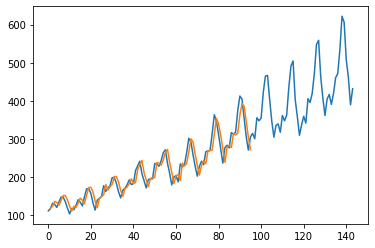

In [46]:
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)

plt.show()
